# First model (Q1)

Importing the required libraries and modules

In [1]:
import torch
import matplotlib.pyplot as plt

from main import train_and_eval
from data import train_loader, test_loader
from torch.distributions.uniform import Uniform

Inspecting the dataset

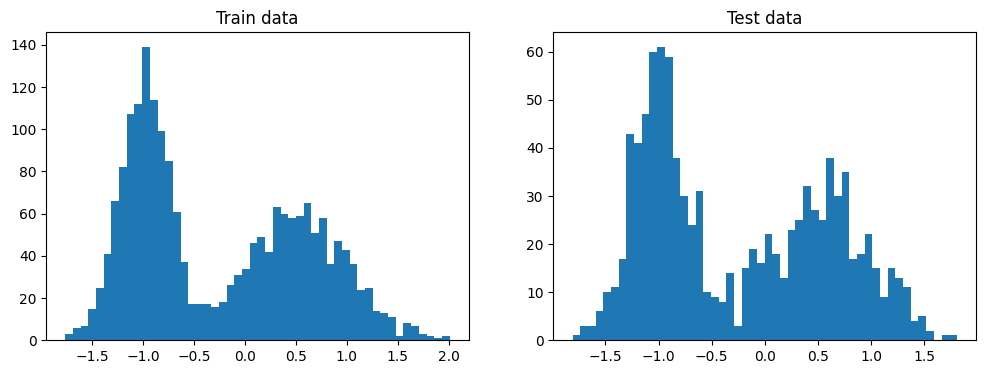

In [2]:
n_components = 5

_, axes = plt.subplots(1, 2, figsize=(12, 4))
_ = axes[0].hist(train_loader.dataset.array, bins=50)
_ = axes[0].set_title('Train data')
_ = axes[1].hist(test_loader.dataset.array, bins=50)
_ = axes[1].set_title('Test data')

Training of the flow model

In [3]:
target_distribution = Uniform(0.0, 1.0)
flow, train_losses, test_losses = train_and_eval(50, 5e-3, train_loader, test_loader, target_distribution, n_components)

Viewing the training and test losses

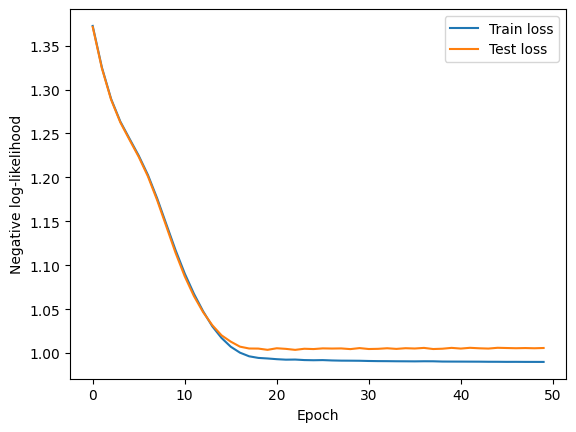

In [4]:
_ = plt.plot(train_losses, label='Train loss')
_ = plt.plot(test_losses, label='Test loss')
_ = plt.xlabel('Epoch')
_ = plt.ylabel('Negative log-likelihood')
plt.legend()

Target probability distribution and the learned flow

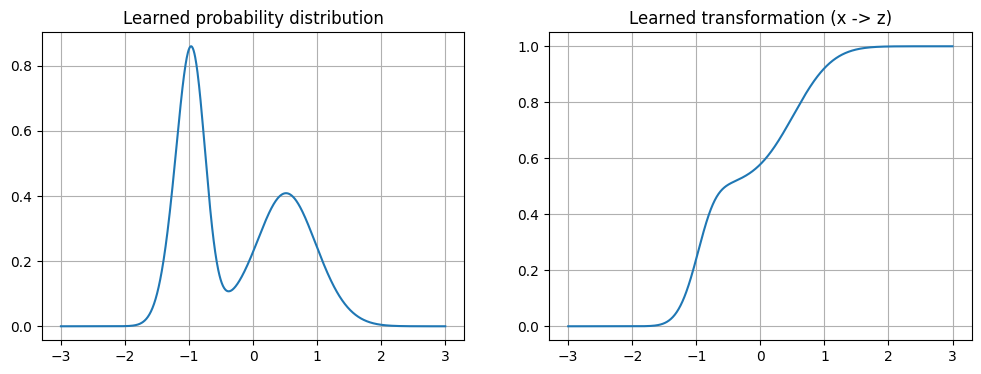

In [5]:
abscissa = torch.linspace(-3, 3, 1000)

with torch.no_grad():
    z, dz_by_dx = flow(torch.FloatTensor(abscissa))
    p_x = (target_distribution.log_prob(z) + dz_by_dx.log()).exp().cpu().numpy()

_, axes = plt.subplots(1, 2, figsize=(12, 4))
_ = axes[0].grid(), axes[1].grid()
_ = axes[0].plot(abscissa, p_x)
_ = axes[0].set_title('Learned probability distribution')
_ = axes[1].plot(abscissa, z)
_ = axes[1].set_title('Learned transformation (x -> z)')

Empirical distribution of the learned distribution


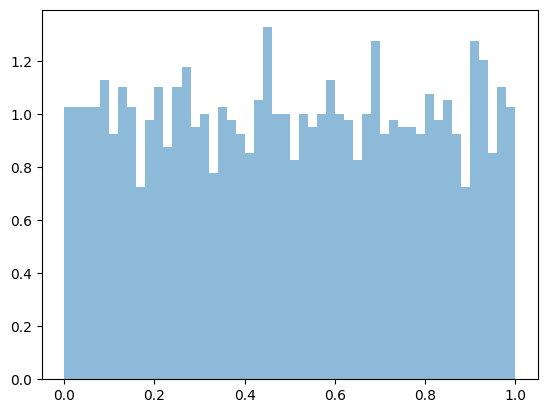

In [6]:
with torch.no_grad():
				z, dz_by_dx = flow(torch.FloatTensor(train_loader.dataset.array))
				p_x = (target_distribution.log_prob(z) + dz_by_dx.log()).exp().cpu().numpy()
				_ = plt.hist(z, bins=50, density=True, alpha=0.5, label='Learned distribution')

Sampling from the learned distribution

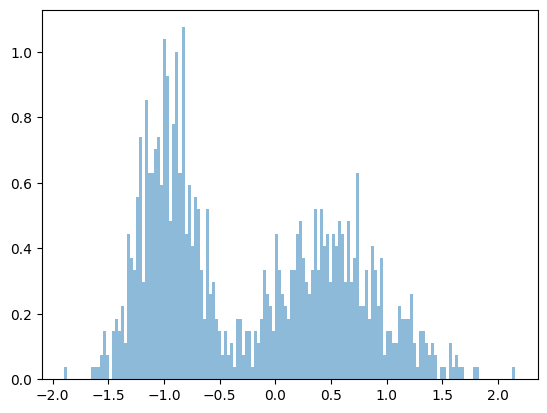

In [7]:
x_hat = flow.generate(target_distribution.sample([1000,1]))
_ = plt.hist(x_hat.cpu().numpy(), bins=150, density=True, alpha=0.5, label='Generated samples')